In [12]:
from puzzlesolver import RotationPuzzle, RotationPuzzleAttempt, RotationPuzzleSolver
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
puzzle = RotationPuzzle(width=6, height=8, random_edgecount=5)
print(puzzle.__str__())

Puzzle :
|-4-|-2-|-4-|-2-|-5-|-2-|
5   5   5   1   1   5   4
|-1-|-2-|-5-|-1-|-2-|-4-|
4   4   2   5   2   3   5
|-3-|-4-|-5-|-5-|-3-|-3-|
3   2   2   4   5   5   1
|-5-|-1-|-4-|-3-|-3-|-5-|
4   1   5   1   4   1   2
|-2-|-3-|-4-|-3-|-4-|-3-|
3   2   3   4   4   3   1
|-4-|-2-|-3-|-2-|-2-|-4-|
2   1   4   5   4   4   5
|-1-|-3-|-4-|-1-|-2-|-4-|
1   5   3   4   1   4   3
|-5-|-1-|-5-|-5-|-4-|-1-|
2   4   5   4   3   5   3
|-4-|-3-|-3-|-3-|-3-|-3-|


In [14]:
puzzle = RotationPuzzle(width=4, height=3, random_edgecount=5)
attempt = RotationPuzzleAttempt(puzzle)
print(attempt.__str__())
print(attempt.checkValidity())
attempt.randomize()
print(attempt.__str__())
print(attempt.checkValidity())

RotationPuzzleAttempt :
|-5-||-4-||-4-||-5-|
3   44   55   44   1
|-2-||-2-||-3-||-4-|
|-2-||-2-||-3-||-4-|
1   11   44   22   2
|-3-||-5-||-2-||-3-|
|-3-||-5-||-2-||-3-|
5   55   22   33   4
|-5-||-4-||-2-||-4-|
True
RotationPuzzleAttempt :
|-2-||-4-||-3-||-4-|
4   34   54   51   4
|-5-||-2-||-4-||-5-|
|-1-||-1-||-2-||-2-|
2   35   23   24   3
|-1-||-4-||-4-||-2-|
|-5-||-4-||-2-||-4-|
3   52   52   23   4
|-5-||-5-||-3-||-3-|
False


In [15]:
puzzle = RotationPuzzle(width=4, height=4, random_edgecount=5, no_symmetry=True)
solver = RotationPuzzleSolver()
print(puzzle.__str__())
res = solver.analyze(puzzle)
print(f"Difficulty {res.difficultyIndex}")
print(f"{len(res.stepStats)} steps :")
print(res.stepStats)
print(f"{len(res.solutions)} solution(s) :")
for attempt in res.solutions:
    print(attempt.__str__())
    print(attempt.checkValidity())

Puzzle :
|-2-|-5-|-4-|-2-|
2   5   3   4   4
|-4-|-5-|-4-|-3-|
4   2   5   1   2
|-1-|-1-|-3-|-2-|
3   5   3   5   4
|-3-|-1-|-1-|-3-|
4   1   5   3   3
|-4-|-5-|-1-|-5-|
Difficulty 9
2 steps :
[[11, 3, 1, 1], [15, 1, 0, 0]]
2 solution(s) :
RotationPuzzleAttempt :
|-2-||-5-||-4-||-2-|
2   55   33   44   4
|-4-||-5-||-4-||-3-|
|-4-||-5-||-4-||-3-|
4   22   55   11   2
|-1-||-1-||-3-||-2-|
|-1-||-1-||-3-||-2-|
3   55   33   55   4
|-3-||-1-||-1-||-3-|
|-3-||-1-||-1-||-3-|
4   11   55   33   3
|-4-||-5-||-1-||-5-|
True
RotationPuzzleAttempt :
|-2-||-5-||-4-||-2-|
2   55   33   44   4
|-4-||-5-||-4-||-3-|
|-4-||-5-||-4-||-3-|
4   22   55   11   2
|-1-||-1-||-3-||-2-|
|-1-||-1-||-3-||-2-|
3   55   33   55   4
|-3-||-1-||-1-||-3-|
|-3-||-1-||-1-||-3-|
4   11   55   33   5
|-4-||-5-||-1-||-3-|
True


In [53]:
solver = RotationPuzzleSolver()
def randomPuzzleAnalyze(width: int, height: int, random_edgecount: int):
    return solver.analyze(RotationPuzzle(width=width, height=height, random_edgecount=random_edgecount, no_symmetry=True))

nb_iter = 100
sizes = [[n, n] for n in range(4, 9)]
edgecounts = range(4, 9)

difficultyStatsRows = []
allAnalysisRows = []

for edgecount in edgecounts:
    for size in sizes:
        print(f"* Puzzle {size[0]}x{size[1]}, {edgecount} different edges")
        analysis = [randomPuzzleAnalyze(size[0], size[1], edgecount) for _ in range(nb_iter)]
        allAnalysisRows = allAnalysisRows + [[size[0], size[1], edgecount, a.difficultyIndex, len(a.solutions)] for a in analysis]
        diffs = [a.difficultyIndex for a in analysis]
        sols = [len(a.solutions) for a in analysis]
        difficultyStatsRows.append([size[0], size[1], edgecount, min(diffs), statistics.median(diffs), max(diffs), min(sols), statistics.median(sols), max(sols)])
        print(f"Difficulty min : {min(diffs)}, med : {statistics.median(diffs)}, max : {max(diffs)}")
        print(f"Nb Solutions min : {min(sols)}, med : {statistics.median(sols)}, max : {max(sols)}")

difficultyStats = pd.DataFrame(difficultyStatsRows, columns=["Width", "Height", "Edges", "Min Diff", "Med Diff", "Max Diff", "Min Sol", "Med Sol", "Max Sol"])
allAnalysis = pd.DataFrame(allAnalysisRows, columns=["Width", "Height", "Edges", "Difficulty", "Solutions"])

* Puzzle 4x4, 4 different edges
Difficulty min : 7, med : 26.0, max : 58
Nb Solutions min : 1, med : 1.0, max : 576
* Puzzle 5x5, 4 different edges
Difficulty min : 11, med : 33.5, max : 72
Nb Solutions min : 1, med : 2.0, max : 64
* Puzzle 6x6, 4 different edges
Difficulty min : 23, med : 43.0, max : 70
Nb Solutions min : 1, med : 2.0, max : 24
* Puzzle 7x7, 4 different edges
Difficulty min : 34, med : 56.0, max : 107
Nb Solutions min : 1, med : 2.0, max : 48
* Puzzle 8x8, 4 different edges
Difficulty min : 42, med : 68.0, max : 109
Nb Solutions min : 1, med : 2.0, max : 192
* Puzzle 4x4, 5 different edges
Difficulty min : 2, med : 14.0, max : 34
Nb Solutions min : 1, med : 1.0, max : 32
* Puzzle 5x5, 5 different edges
Difficulty min : 7, med : 17.0, max : 33
Nb Solutions min : 1, med : 1.0, max : 48
* Puzzle 6x6, 5 different edges
Difficulty min : 10, med : 25.0, max : 47
Nb Solutions min : 1, med : 1.0, max : 8
* Puzzle 7x7, 5 different edges
Difficulty min : 13, med : 31.0, max : 5

In [54]:
difficultyStats["Size"] = difficultyStats["Width"].astype(str) + "x" + difficultyStats["Height"].astype(str)
allAnalysis["Size"] = allAnalysis["Width"].astype(str) + "x" + allAnalysis["Height"].astype(str)
difficultyStats["SizeEdge"] = difficultyStats["Size"].astype(str) + ":" + difficultyStats["Edges"].astype(str)
allAnalysis["SizeEdge"] = allAnalysis["Size"].astype(str) + ":" + allAnalysis["Edges"].astype(str)

Text(0.5, 1.0, 'Difficulty')

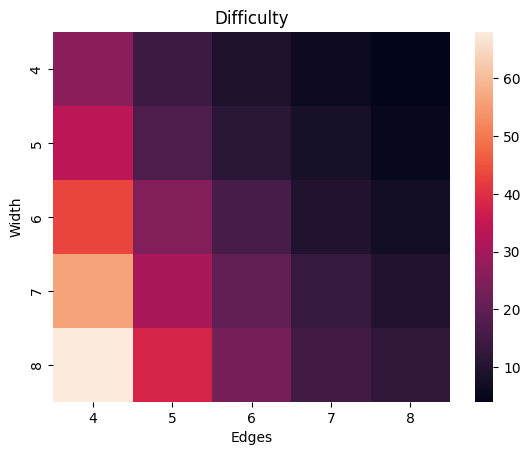

In [55]:
snspivot = difficultyStats.pivot(index="Width", columns="Edges", values="Med Diff")
ax = sns.heatmap(snspivot)
ax.set_title('Difficulty')

Text(0.5, 1.0, 'Solutions')

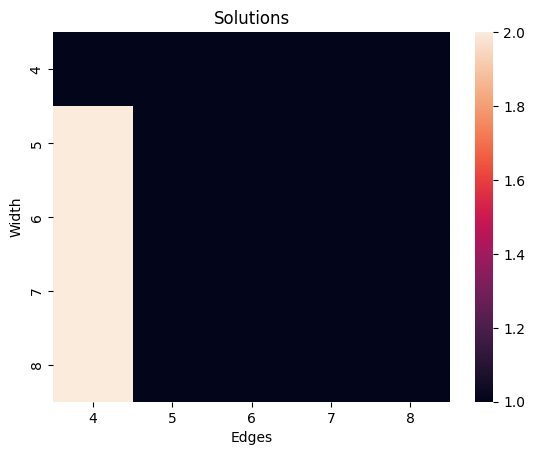

In [56]:
snspivot = difficultyStats.pivot(index="Width", columns="Edges", values="Med Sol")
ax = sns.heatmap(snspivot)
ax.set_title('Solutions')

Text(0.5, 1.0, 'Difficulty')

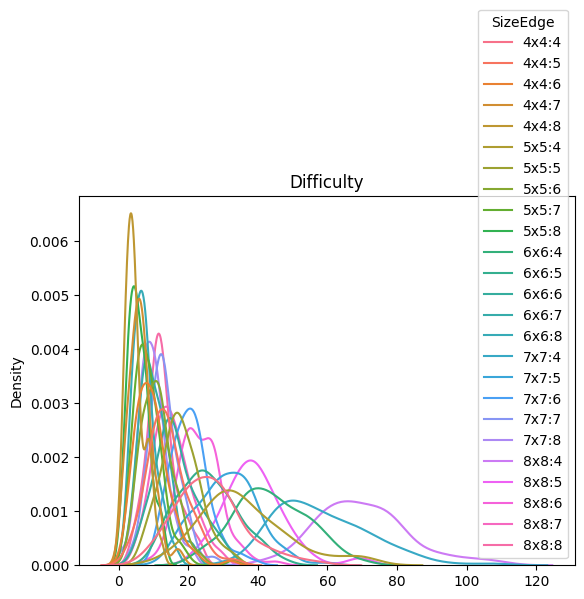

In [57]:
snspivot = allAnalysis.pivot(columns="SizeEdge", values="Difficulty")
ax = sns.kdeplot(snspivot)
ax.set_title('Difficulty')

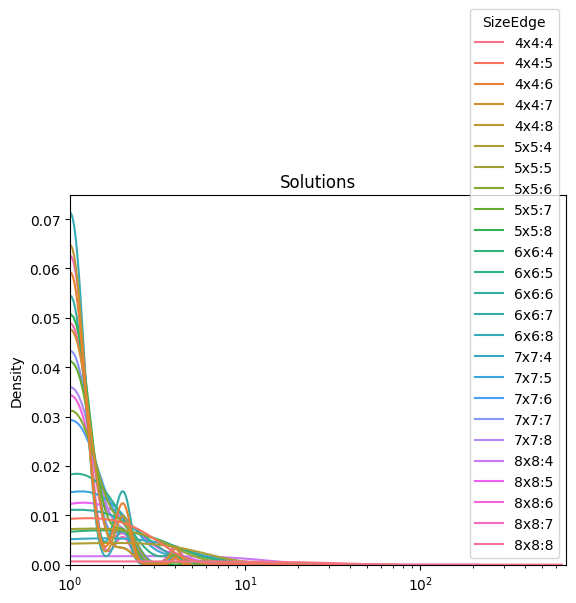

In [58]:
snspivot = allAnalysis.pivot(columns="SizeEdge", values="Solutions")
ax = sns.kdeplot(snspivot)
ax.set_title('Solutions')
ax.set_xlim(left=1)
ax.set_xscale('log')

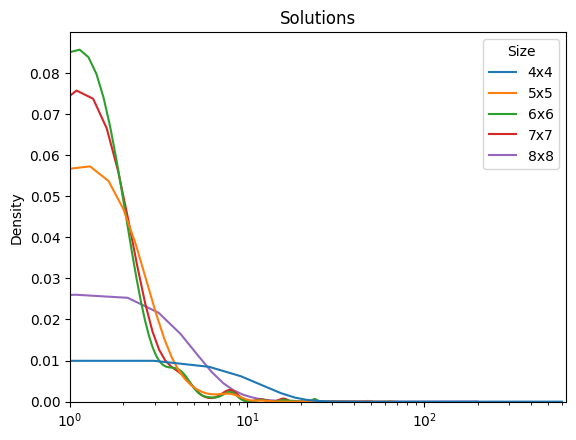

In [59]:
snspivot = allAnalysis.pivot(columns="Size", values="Solutions")
ax = sns.kdeplot(snspivot)
ax.set_title('Solutions')
ax.set_xlim(left=1)
ax.set_xscale('log')

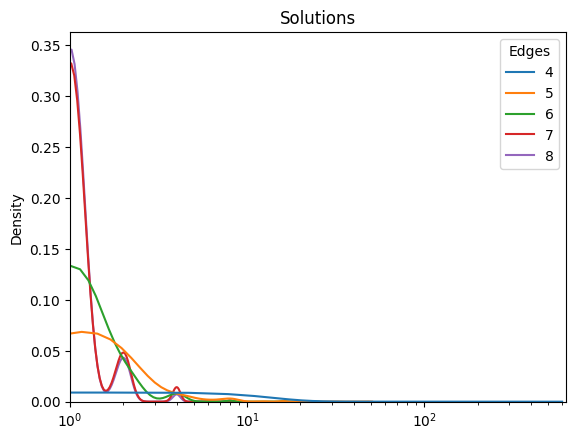

In [60]:
snspivot = allAnalysis.pivot(columns="Edges", values="Solutions")
ax = sns.kdeplot(snspivot)
ax.set_title('Solutions')
ax.set_xlim(left=1)
ax.set_xscale('log')